In [1]:
### Use this workbook SIXTH in sequence.

### This workbook explores the combined data from UN Votes, US Aid, and World Bank demographics.

# Initial setup

import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_rows = 800

data = pd.read_csv('Modified_Data/VoteDiffsWithTotalAid.csv')
data.index.name = 'record'
data

,Unnamed: 0,issue,membership,vote_foreign,code,name,year,aid,total_aid,vote_usa,vote_diff
record,,,,,,,,,,,
0,0,20.000,1.000,1,AFG,Afghanistan,1946,0.000,0.000,1,0
1,1,21.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,1,1
2,2,22.000,1.000,1,AFG,Afghanistan,1946,0.000,0.000,3,4
3,3,23.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,1,1
4,4,24.000,1.000,1,AFG,Afghanistan,1946,0.000,0.000,1,0
5,5,25.000,1.000,1,AFG,Afghanistan,1946,0.000,0.000,1,0
6,6,26.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,3,1
7,7,27.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,1,1
8,8,28.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,1,1


In [2]:
pd.options.display.float_format = '{:.3f}'.format
from scipy import stats 
data.corr()

,Unnamed: 0,issue,membership,vote_foreign,year,aid,total_aid,vote_usa,vote_diff
Unnamed: 0,1.000,0.009,nan,-0.000,0.009,-0.033,-0.056,0.003,0.007
issue,0.009,1.000,nan,-0.091,0.904,-0.022,0.078,0.222,0.209
membership,nan,nan,nan,nan,nan,nan,nan,nan,nan
vote_foreign,-0.000,-0.091,nan,1.000,-0.119,0.042,0.087,0.038,-0.340
year,0.009,0.904,nan,-0.119,1.000,-0.032,0.086,0.248,0.229
aid,-0.033,-0.022,nan,0.042,-0.032,1.000,0.438,-0.008,-0.028
total_aid,-0.056,0.078,nan,0.087,0.086,0.438,1.000,0.019,-0.053
vote_usa,0.003,0.222,nan,0.038,0.248,-0.008,0.019,1.000,0.663
vote_diff,0.007,0.209,nan,-0.340,0.229,-0.028,-0.053,0.663,1.000


In [3]:
data.describe()

,Unnamed: 0,issue,membership,vote_foreign,year,aid,total_aid,vote_usa,vote_diff
count,851920.000,851920.000,851920.000,851920.000,851920.000,851920.000,851920.000,851920.000,851920.000
mean,425959.500,3192.406,1.000,1.340,1988.628,158674359.578,6158226834.062,2.281,1.906
std,245928.265,1578.414,0.000,0.599,16.745,742259539.138,16734816906.960,0.837,1.728
min,0.000,3.000,1.000,1.000,1946.000,-426185314.000,0.000,1.000,0.000
25%,212979.750,1902.000,1.000,1.000,1978.000,59288.000,74602129.000,2.000,0.000
50%,425959.500,3259.000,1.000,1.000,1987.000,10153011.500,754499184.000,3.000,1.000
75%,638939.250,4477.000,1.000,2.000,2003.000,69707652.000,3607588367.000,3.000,4.000
max,851919.000,9056.000,1.000,3.000,2017.000,34916000823.000,227634027836.000,3.000,4.000


In [4]:
bankdata = pd.read_csv('Modified_Data/AidVotesBank.csv')
bankdata.describe()

,Unnamed: 0,Unnamed: 0.1,issue,membership,vote_foreign,year,aid,total_aid,vote_usa,vote_diff,...,fertility,GDPpercap,gini,life_exp,literacy,exports,pop_density,pop,rural,gdp
count,790903.000,790903.000,790903.000,790903.000,790903.000,790903.000,790903.000,790903.000,790903.000,790903.000,...,771601.000,693105.000,109955.000,772575.000,61942.000,653501.000,772524.000,790238.000,790446.000,693313.000
mean,395451.000,421832.579,3339.162,1.000,1.320,1990.755,148387622.282,6418645108.371,2.310,1.956,...,4.105,10401.672,39.533,63.809,77.766,34.259,176.926,30552226.378,50.737,252759947967.113
std,228314.174,243855.008,1446.835,0.000,0.576,14.910,667522295.043,17147946489.653,0.825,1.727,...,2.019,16865.791,9.589,11.245,22.644,24.873,921.989,113625100.005,24.518,1006875883935.275
min,0.000,641.000,627.000,1.000,1.000,1960.000,-16211959.000,0.000,1.000,0.000,...,1.052,133.967,21.000,18.907,5.405,0.005,0.632,9394.000,0.000,29010251.779
25%,197725.500,212772.500,2121.000,1.000,1.000,1980.000,98893.000,101368922.000,2.000,0.000,...,2.140,1108.586,32.000,55.139,65.145,17.810,17.697,1823216.000,30.846,3988772862.249
50%,395451.000,422440.000,3422.000,1.000,1.000,1989.000,11467648.000,834375199.000,3.000,1.000,...,3.843,3358.096,37.700,66.911,87.804,28.552,51.552,6443751.000,52.085,16181972308.499
75%,593176.500,634207.500,4538.000,1.000,2.000,2004.000,69910006.000,3910736331.000,3.000,4.000,...,5.979,12328.156,46.800,72.605,94.900,44.346,122.210,19413000.000,71.465,124233662847.219
max,790902.000,851919.000,9056.000,1.000,3.000,2017.000,14712672876.000,227634027836.000,3.000,4.000,...,8.462,193745.575,65.800,85.417,99.998,228.994,19196.000,1386395000.000,97.846,17348626599500.000


In [5]:
#Group and average votes by country-year.
a = data.groupby(['code', 'year'])['vote_diff'].mean()
a = pd.DataFrame(a)
a = a.reset_index()
a

,code,year,vote_diff
0,AFG,1946,1.192
1,AFG,1947,1.711
2,AFG,1948,1.297
3,AFG,1949,1.510
4,AFG,1950,1.200
5,AFG,1951,1.714
6,AFG,1952,1.786
7,AFG,1953,1.500
8,AFG,1954,1.258
9,AFG,1955,1.405


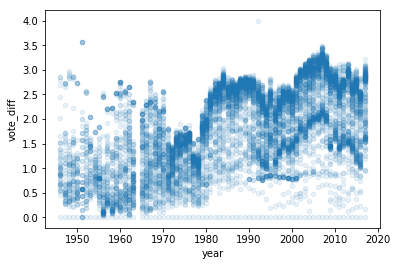

In [6]:
# Show average alignment in each country-year.
import matplotlib.pyplot as plt
%matplotlib inline
a.plot(kind='scatter', x='year', y='vote_diff', alpha=0.1)
plt.show()

In [7]:
bankdata = pd.read_csv('Modified_Data/AidVotesBank.csv')
bankdata.head()

,Unnamed: 0,Unnamed: 0.1,issue,membership,vote_foreign,code,name_x,year,aid,total_aid,...,fertility,GDPpercap,gini,life_exp,literacy,exports,pop_density,pop,rural,gdp
0,0,641,627.000,1.000,3,AFG,Afghanistan,1960,69454739.000,673372854.000,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
1,1,642,628.000,1.000,2,AFG,Afghanistan,1960,69454739.000,673372854.000,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
2,2,643,629.000,1.000,1,AFG,Afghanistan,1960,69454739.000,673372854.000,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
3,3,644,630.000,1.000,3,AFG,Afghanistan,1960,69454739.000,673372854.000,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
4,4,645,631.000,1.000,1,AFG,Afghanistan,1960,69454739.000,673372854.000,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan


In [8]:
bankdata = bankdata.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'membership'])
bankdata.head()

,issue,vote_foreign,code,name_x,year,aid,total_aid,vote_usa,vote_diff,name_y,...,fertility,GDPpercap,gini,life_exp,literacy,exports,pop_density,pop,rural,gdp
0,627.000,3,AFG,Afghanistan,1960,69454739.000,673372854.000,1,4,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
1,628.000,2,AFG,Afghanistan,1960,69454739.000,673372854.000,1,1,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
2,629.000,1,AFG,Afghanistan,1960,69454739.000,673372854.000,3,4,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
3,630.000,3,AFG,Afghanistan,1960,69454739.000,673372854.000,1,4,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
4,631.000,1,AFG,Afghanistan,1960,69454739.000,673372854.000,3,4,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan


In [9]:
# Identify the strongest correlations betweeen voting alignment and World Bank demographic variables

demographic_corrs = bankdata.corr()['vote_diff'].sort_values()
demographic_corrs

vote_foreign   -0.362
GDPpercap      -0.105
gdp            -0.100
energy         -0.084
total_aid      -0.058
debt           -0.036
aid            -0.015
life_exp       -0.004
pop_density    -0.002
literacy        0.000
fertility       0.011
pop             0.025
exports         0.035
rural           0.049
gini            0.119
issue           0.195
year            0.200
vote_usa        0.680
vote_diff       1.000
Name: vote_diff, dtype: float64

Text(0,0.5,'Correlation')

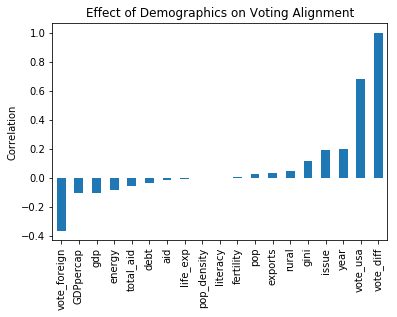

In [10]:
# Visually graph the exogenous variables that have the strongest correlations

demographic_bars = demographic_corrs.plot(kind='bar', title='Effect of Demographics on Voting Alignment')
demographic_bars.set_ylabel('Correlation')

In [11]:
# Remove Israel, the most prominent outlier, to see if that changes the pattern of correlations

isrealis = bankdata[bankdata['code'] == 'ISR'].index
bankdata_no_isr = bankdata.drop(isrealis)
bankdata_no_isr.head(800)

,issue,vote_foreign,code,name_x,year,aid,total_aid,vote_usa,vote_diff,name_y,...,fertility,GDPpercap,gini,life_exp,literacy,exports,pop_density,pop,rural,gdp
0,627.000,3,AFG,Afghanistan,1960,69454739.000,673372854.000,1,4,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
1,628.000,2,AFG,Afghanistan,1960,69454739.000,673372854.000,1,1,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
2,629.000,1,AFG,Afghanistan,1960,69454739.000,673372854.000,3,4,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
3,630.000,3,AFG,Afghanistan,1960,69454739.000,673372854.000,1,4,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
4,631.000,1,AFG,Afghanistan,1960,69454739.000,673372854.000,3,4,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
5,632.000,1,AFG,Afghanistan,1960,69454739.000,673372854.000,3,4,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
6,633.000,1,AFG,Afghanistan,1960,69454739.000,673372854.000,3,4,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
7,634.000,3,AFG,Afghanistan,1960,69454739.000,673372854.000,1,4,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
8,635.000,3,AFG,Afghanistan,1960,69454739.000,673372854.000,1,4,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
9,636.000,3,AFG,Afghanistan,1960,69454739.000,673372854.000,1,4,Afghanistan,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan


In [12]:
# Check the correlations without Israel to confirm that there is no significant difference.
demographic_corrs_no_isr = bankdata_no_isr.corr()['vote_diff'].sort_values()
demographic_corrs_no_isr

vote_foreign   -0.359
GDPpercap      -0.101
gdp            -0.101
energy         -0.084
debt           -0.032
total_aid      -0.030
pop_density    -0.001
life_exp        0.002
literacy        0.002
fertility       0.008
pop             0.024
aid             0.026
exports         0.034
rural           0.041
gini            0.119
issue           0.196
year            0.201
vote_usa        0.684
vote_diff       1.000
Name: vote_diff, dtype: float64